In [10]:
from lxml import etree
from opendriveparser import parse_opendrive
from opendrive2lanelet import Network
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Path as csv

In [12]:
def loadOpenDriveFile(path):
    # Load road network and print some statistics
    fh = open(path, 'r')
    openDriveXml = parse_opendrive(etree.parse(fh).getroot())
    fh.close()
    
    roadNetwork = Network()
    roadNetwork.loadOpenDrive(openDriveXml)
    
    print("Name: {}<br>Version: {}<br>Date: {}<br><br>OpenDRIVE Version {}.{}<br><br>Number of roads: {}<br>Total length of road network: {:.2f} meters".format(
            openDriveXml.header.name if openDriveXml.header.name else "<i>unset</i>",
            openDriveXml.header.version,
            openDriveXml.header.date,
            openDriveXml.header.revMajor,
            openDriveXml.header.revMinor,
            len(openDriveXml.roads),
            sum([road.length for road in openDriveXml.roads])))
    
    return roadNetwork, openDriveXml

In [26]:
path = 'C:/Users/Phil/Google Drive/JKU AADC/Resources/OpenDRIVE/openDRIVE_example_maps/'
path = '/home/aadc/AADC/src/aadcUserPython/OpenDRIVE/openDRIVE_example_maps/'
easyFile = 'aadc2018#1.xodr'
ourMap = 'ourMAP.xodr'
comp = 'aadc2017#competition.xodr'
hard = 'KA-Suedtangente-Vires.xodr'
roadNetwork, openDriveXml = loadOpenDriveFile(path+hard)

Name: <i>unset</i><br>Version: None<br>Date: None<br><br>OpenDRIVE Version 1.4<br><br>Number of roads: 111<br>Total length of road network: 9317.65 meters


In [27]:
roads = openDriveXml.roads
r = roads[0]
r.length

4.826529052133281

166-164-161-160-158-157-156-153-152-151-149-146-145-154-144-143-141-137-165-136-135-134-133-131-129-125-121-115-111-114-109-108-106-148-105-104-103-102-98-96-142-92-88-87-147-86-107-85-140-84-150-95-82-80-79-159-78-75-74-73-72-139-68-119-128-167-66-63-93-61-59-155-58-91-54-57-83-52-65-117-123-50-162-48-124-45-41-118-126-39-37-97-44-36-35-33-27-26-76-110-127-94-32-89-64-24-51-21-69-67-116-20-70-19-77-101-18-71-31-49-15-53-120-28-14-132-13-30-47-138-23-60-43-12-17-34-38-10-6-5-56-7-46-40-3-22-122-4-99-16-163-112-11-29-90-2-9-1-

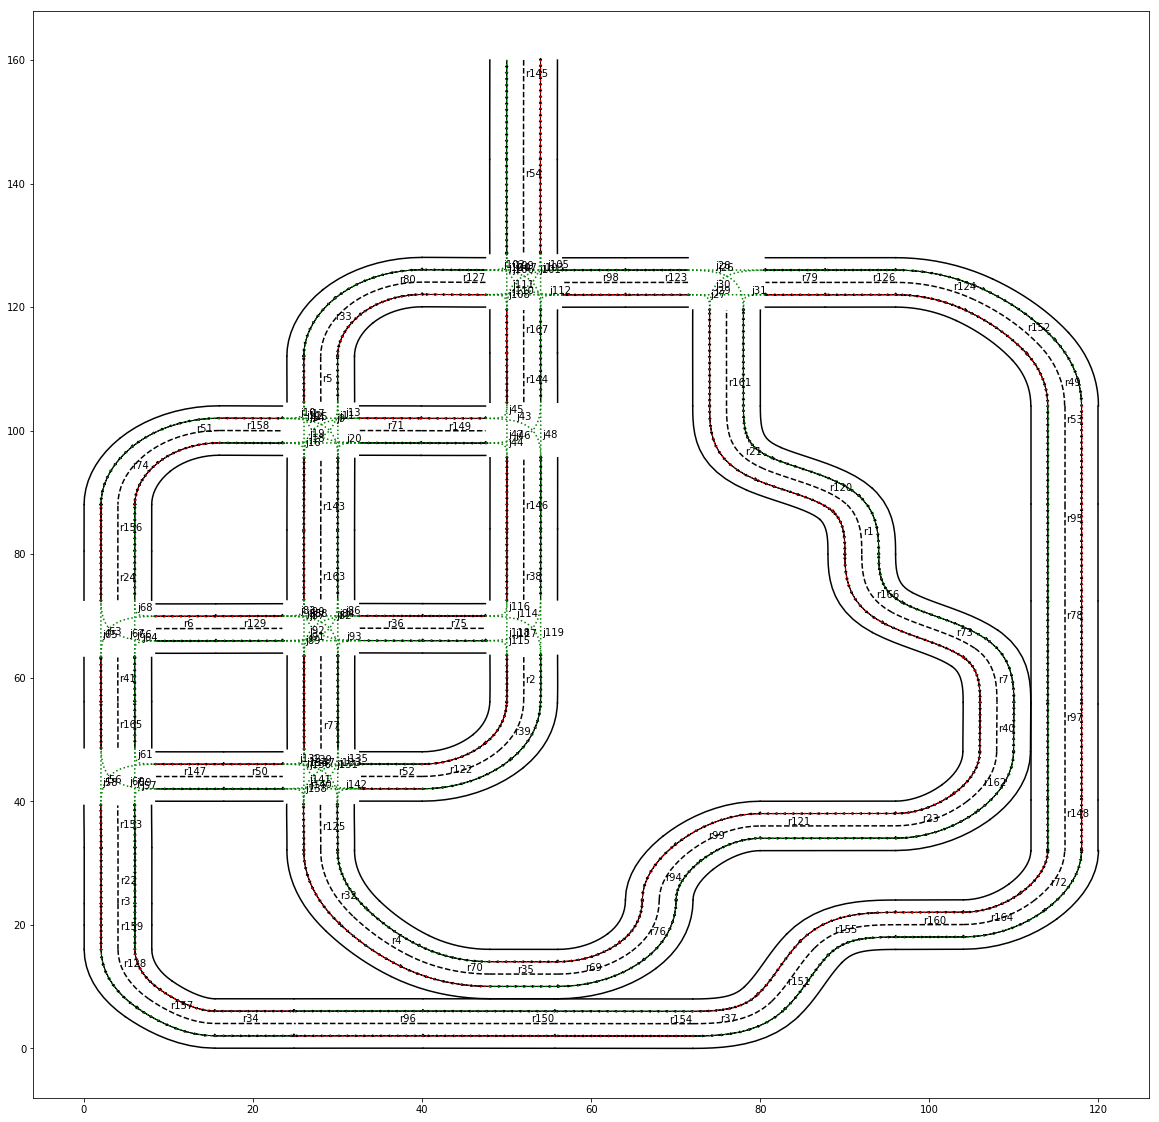

In [25]:
from opendriveparser.elements.roadPlanView import ParamPoly3
import matplotlib.pyplot as plt
%matplotlib inline
#gtk

plt.figure(figsize=(20,20))

for r in roads:
    # """ Calculate position and tangent at sPos """
    #try:
    #    print('{}-{}-{}'.format(r.link.predecessor.elementId, r.id, r.link.successor.elementId))
    #except:
    #    print('--')
    
    xs=[]
    ys=[]
    degs=[]
    
    for idx, i in enumerate(range(0,50)):
        
        [x,y],t = r.planView.calc(i) #t is degrees of line in radians
        xs.append(x)
        ys.append(y)
        degs.append(t) #in radians
        
        # stop when calc outputs the same pos
        if idx == 0:
            print(r.id,end='-')
        else:
            if x*100==xs[idx-1]*100 and y*100==ys[idx-1]*100:
             #   print(r.planView.getLength())
             #   print(idx)
                break
    
    s=''
    if r.junction==None: #it has to be a road
        s+=('r')
        for c, offset in [['k',-4],['r:',-2],['g:',2],['k',4]]:
            dx=np.sin(degs)*offset
            dy=np.cos(degs)*-1*offset
            plt.plot(np.asarray(xs)+dx,np.asarray(ys)+dy,c)
            if c=='g:': #right side
                for i in range(len(xs)-1):
                    plt.arrow(xs[i]+dx[i],
                              ys[i]+dy[i],
                              xs[i+1]+dx[i+1]-(xs[i]+dx[i]),
                              ys[i+1]+dy[i+1]-(ys[i]+dy[i]),
                              head_width=0.3, head_length=0.3, fc='k', ec='k')
            if c=='r:':
                for i in range(len(xs)-1):
                    plt.arrow(xs[i+1]+dx[i+1],
                              ys[i+1]+dy[i+1],
                              xs[i+0]+dx[i+0]-(xs[i+1]+dx[i+1]),
                              ys[i+0]+dy[i+0]-(ys[i+1]+dy[i+1]),
                              head_width=0.3, head_length=0.3, fc='k', ec='k')
          #  plt.arrow(xs[3]+dx[3],
          #            ys[3]+dy[3],
          #            dy[3],
          #            dx[3],
          #            head_width=0.5, head_length=0.5, fc='k', ec='k')
        plt.plot(xs,ys,'k--') #middle line
        
    else: 
        s+='j'
        plt.plot(xs,ys,'g:')
     #   for c, offset in [['g--',1]]:
     #       dx=np.sin(degs)*offset
     #       dy=np.cos(degs)*offset
     #       plt.plot(np.asarray(xs)+dx,np.asarray(ys)-dy,c)
   # plt.arrow(xs[0],ys[0],xs[3]-xs[0],ys[3]-ys[0],head_width=0.5, head_length=0.5, fc='k', ec='k')
    plt.text(xs[3]+0.2,ys[3]+0.2,s+str(r.id))#+'  '+str(degs[3]*180/np.pi))
    
   # plt.ylim([-10,60])
   # plt.xlim([-10,60])

In [20]:
def plotMap(roads):
    for r in roads:
        xs=[]
        ys=[]
        degs=[]
        for idx, i in enumerate(range(0,50)):
            [x,y],t = r.planView.calc(i) #t is degrees of line in radians
            xs.append(x)
            ys.append(y)
            degs.append(t) #in radians

            # stop when calc outputs the same pos
            if idx == 0:
                print(r.id,end='-')
            else: 
                if x*100==xs[idx-1]*100 and y*100==ys[idx-1]*100:
                    break
        s=''
        if r.junction==None: #it has to be a road
            s+=('r')
            for c, offset in [['k',-4],['r:',-2],['g:',2],['k',4]]:
                dx=np.sin(degs)*offset
                dy=np.cos(degs)*-1*offset
                plt.plot(np.asarray(xs)+dx,np.asarray(ys)+dy,c)
                if c=='g:': #right side
                    plt.arrow(xs[0]+dx[0],
                              ys[0]+dy[0],
                              xs[3]+dx[3]-(xs[0]+dx[0]),
                              ys[3]+dy[3]-(ys[0]+dy[0]),
                              head_width=0.5, head_length=0.5, fc='k', ec='k')
                if c=='r:':
                    plt.arrow(xs[3]+dx[3],
                              ys[3]+dy[3],
                              xs[0]+dx[0]-(xs[3]+dx[3]),
                              ys[0]+dy[0]-(ys[3]+dy[3]),
                              head_width=0.5, head_length=0.5, fc='k', ec='k')
            plt.plot(xs,ys,'k--') #middle line

        else: 
            s+='j'
            plt.plot(xs,ys,'g:')
        plt.text(xs[3]+0.2,ys[3]+0.2,s+str(r.id))#+'  '+str(degs[3]*180/np.pi))

In [21]:
roads[3].planView.calc(0)

(array([28.03624637, 34.53878581]), 1.5747119499218678)

In [22]:
geometry.calc

NameError: name 'geometry' is not defined

In [66]:
#fh = open("test/opendrive-1.xodr", 'r')
loc = 'C:/Users/Phil/Google Drive/JKU AADC/Resources/OpenDRIVE/'
fh = open(loc+'openDRIVE_example_maps/aadc2018#1.xodr', 'r')
openDrive = parse_opendrive(etree.parse(fh).getroot())
fh.close()

roadNetwork = Network()
roadNetwork.loadOpenDrive(openDrive)

scenario = roadNetwork.exportCommonRoadScenario()

fh = open("test/opendrive-1.xml", "wb")
fh.write(scenario.export_to_string())
fh.close()

In [67]:
import os
import sys
from lxml import etree
from opendriveparser import parse_opendrive

# OpenDriveFile
fn = 'openDRIVE_example_maps/aadc2018#1.xodr'

with open(fn, 'r') as fh:
    parser = etree.XMLParser()
    rootNode = etree.parse(fh, parser).getroot()
    roadNetwork = parse_opendrive(rootNode)

FileNotFoundError: [Errno 2] No such file or directory: 'openDRIVE_example_maps/aadc2018#1.xodr'

In [ ]:
roadNetwork.roads

55-54-57-45-42-41-39-44-36-35-27-21-23-30-19-18-15-28-14-43-12-17-10-8-6-5-22-4-56-40-7-16-11-29-2-9-1-

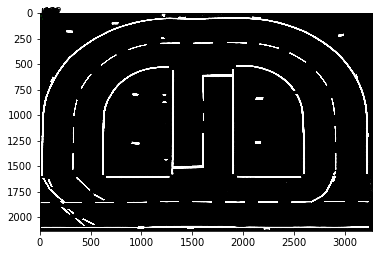

In [221]:
mapImg = 'C:/Users/Phil/Google Drive/JKU AADC/Resources/OpenDRIVE/ourMap.jpg'
from PIL import Image                                                                                
img = Image.open(mapImg)
plt.imshow(np.asarray(img))
plotMap(roads)

# only plot drivable lane

In [133]:
def getTrajectory(roads):
    plt.figure(figsize=(50,50))
    for cc, r in enumerate(roads):
        lw=3
        xs=[]
        ys=[]
        degs=[]
        for idx, i in enumerate(range(0,50)):
            [x,y],t = r.planView.calc(i) #t is degrees of line in radians
            xs.append(x)
            ys.append(y)
            degs.append(t) #in radians

            # stop when calc outputs the same pos
            if idx == 0:
                print(r.id,end='-')
            else: 
                if x*100==xs[idx-1]*100 and y*100==ys[idx-1]*100:
                    break
        s=''
        if r.junction==None: #it has to be a road
            s+=('r')
            for c, offset in enumerate([-2,2]): #['k',4]['k',4]
                dx=np.sin(degs)*offset
                dy=np.cos(degs)*-1*offset
            #actual plotting    
                plt.plot(np.asarray(xs)+dx,np.asarray(ys)+dy,c=str(cc*2+c+1),linewidth=lw)
        else: 
            s+='j'
            #actual plotting 
            plt.plot(xs,ys,c=str(cc*2+1),linewidth=lw)

    plt.axis('off')
    plt.savefig('asdf')

55-54-57-45-42-41-39-44-36-35-27-21-23-30-19-18-15-28-14-43-12-17-10-8-6-5-22-4-56-40-7-16-11-29-2-9-1-

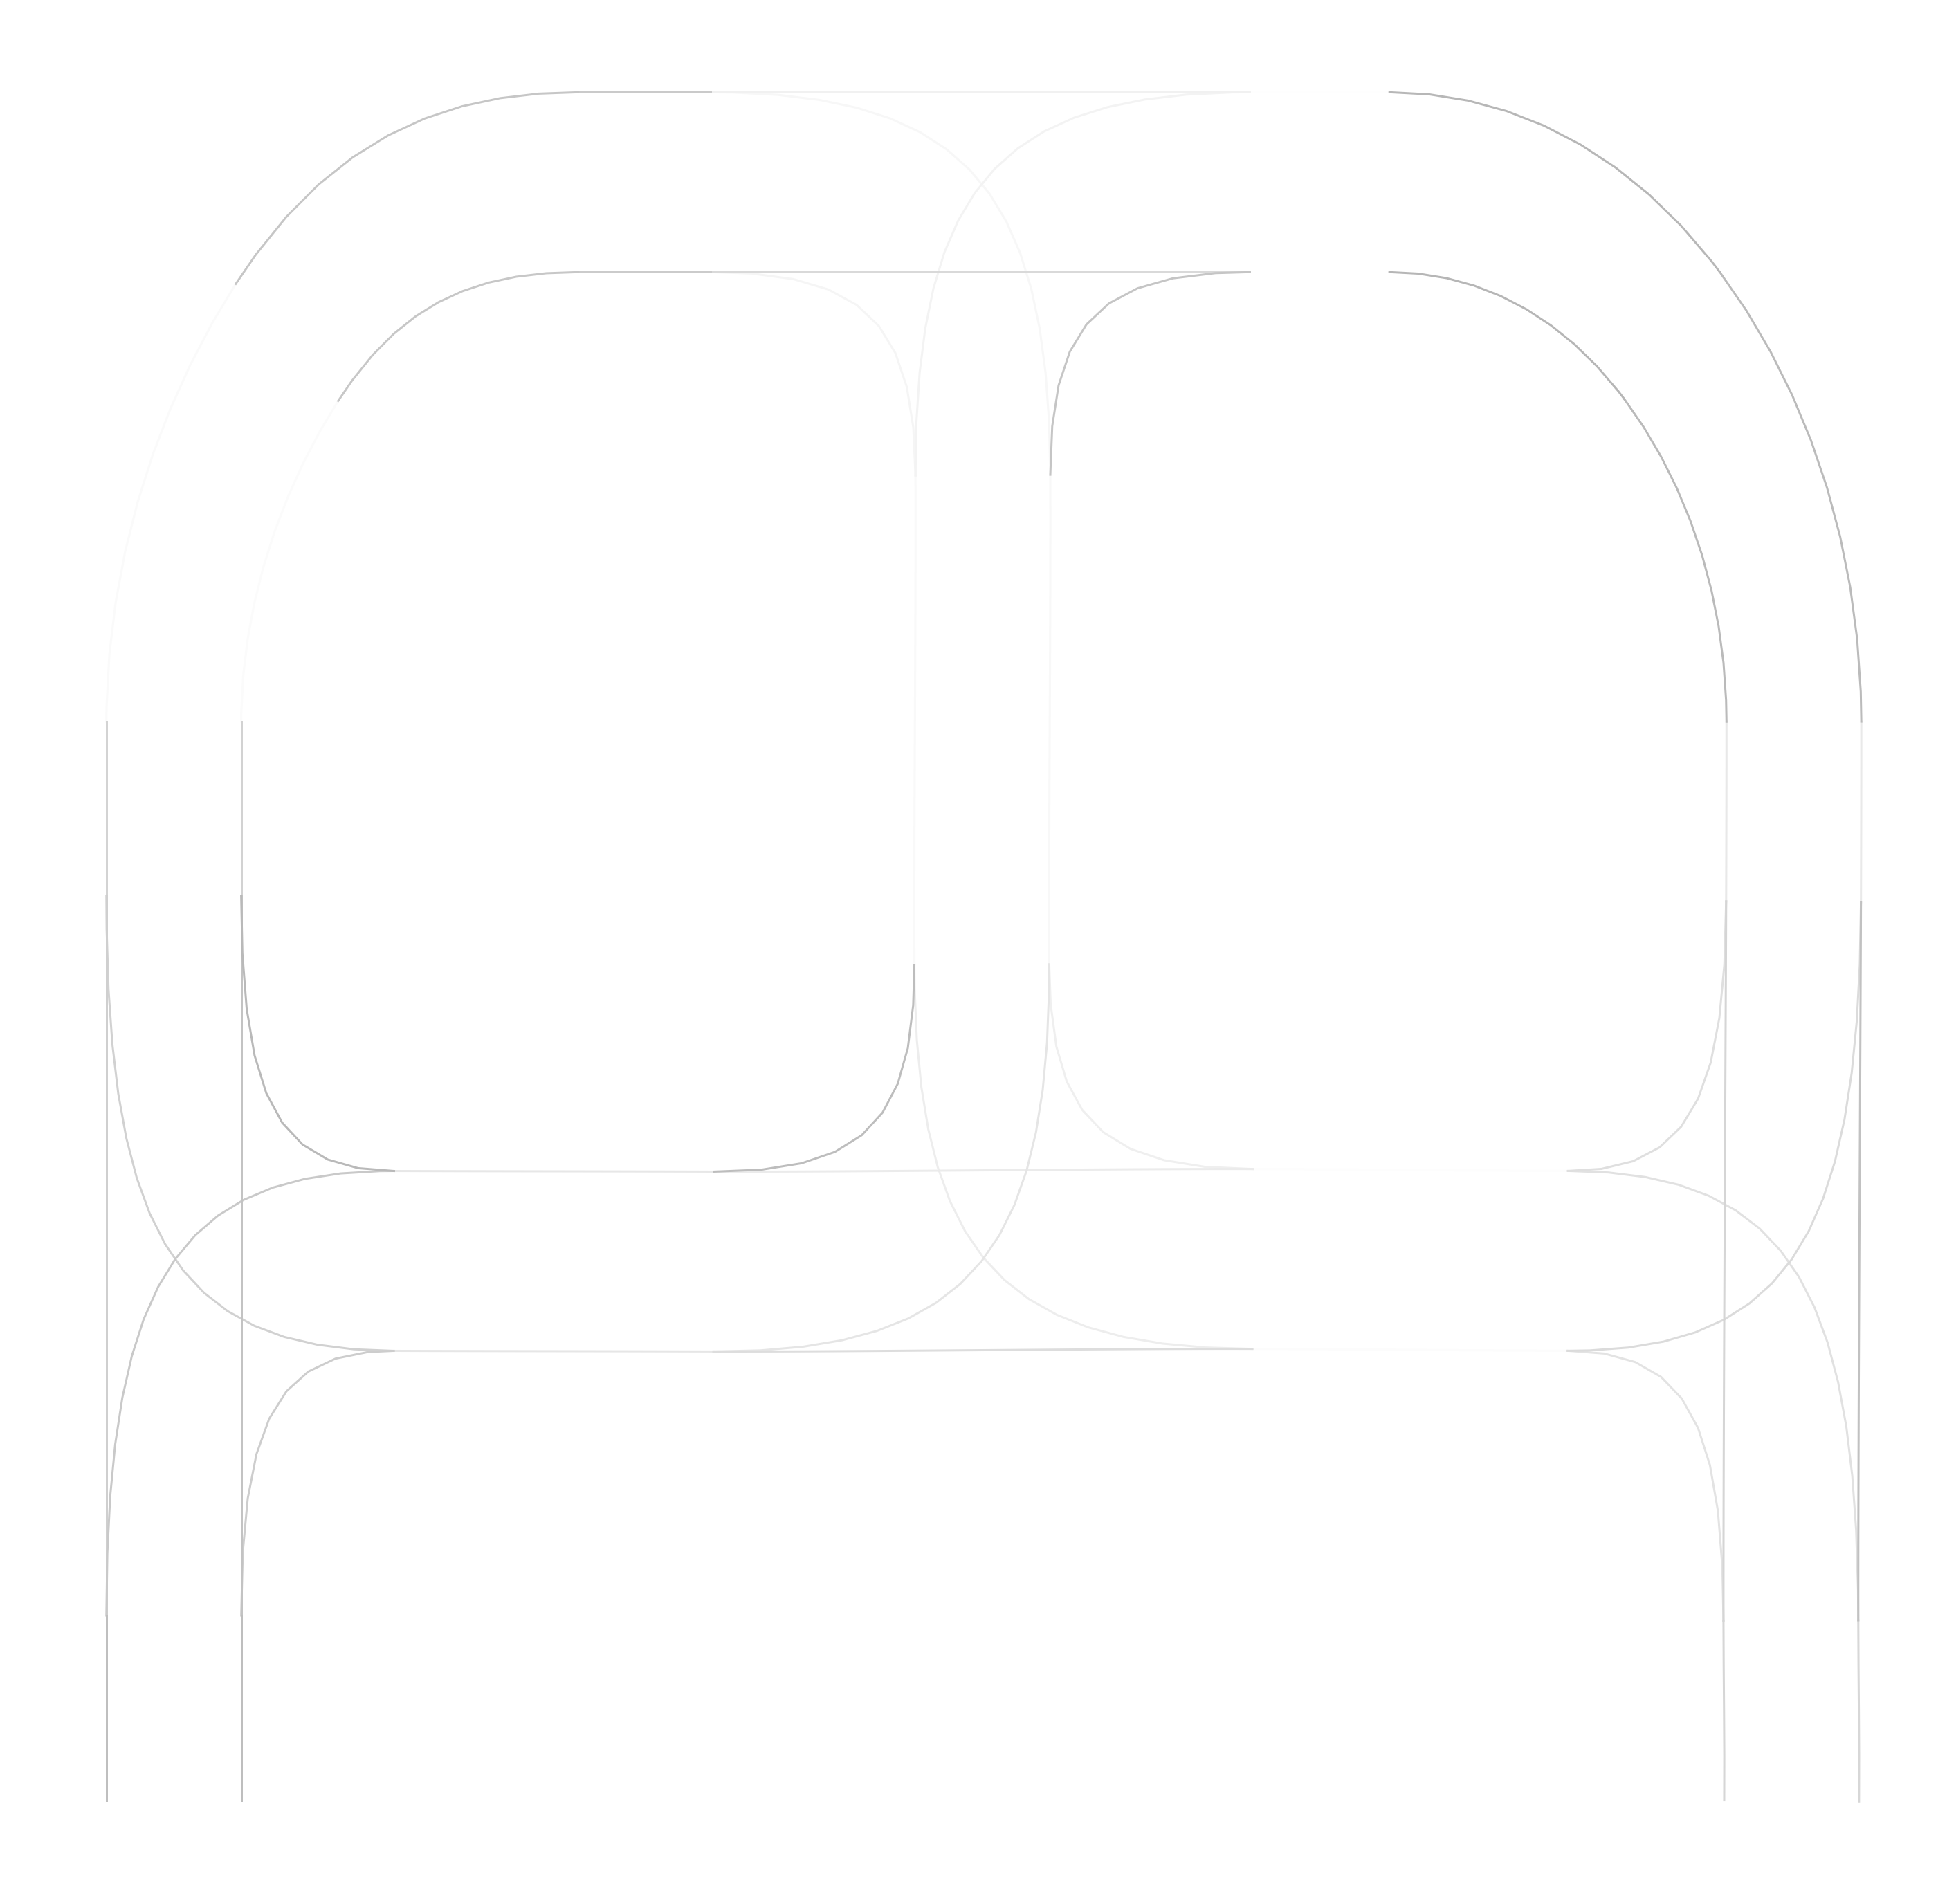

In [134]:
%matplotlib inline
getTrajectory(roads)

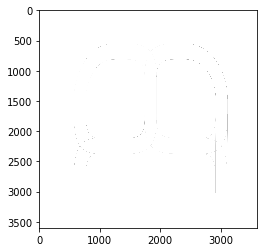

In [135]:
from PIL import Image
img = np.asarray(Image.open("asdf.png"))

plt.imshow(img)

In [137]:
trajArray = np.abs( img.sum(axis=2)-np.median(img.sum(axis=2)))
np.savez_compressed('trajectoryArray',trajArray)

In [138]:
trajArray.shape

(3600, 3600)

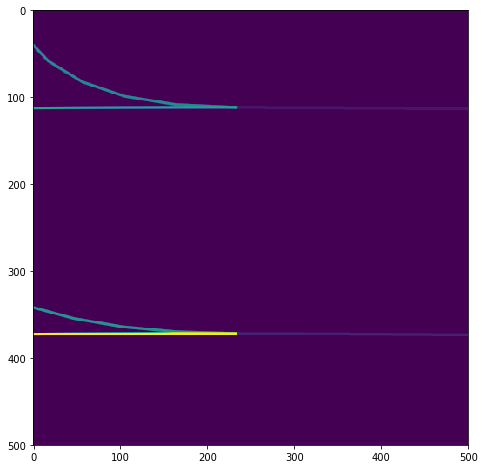

In [148]:
%matplotlib inline
plt.figure(figsize=(8,8))
plt.imshow(trajArray[2000:2500,2000:2500],cmap='viridis')